# Problem Set 3
## Question 2

In [1]:
import numpy as np
import sympy as sym

from sympy import oo 
sym.init_printing(use_latex=True)

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams

rcParams['figure.dpi'] = 80
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')
from ipywidgets import interact
from matplotlib import cm 

In [2]:
U,x1,x2,alpha,gamma,lam = sym.symbols("U, x1, x2, alpha,gamma,lambda")
p1,p2,p3,I,beta = sym.symbols("p1,p2, p3,I,beta")

## Part a

### Substitution of budget constraint into objective function

In [3]:
U = (alpha *((I-p2*x2)/p1)** gamma + (1-alpha)*x2**gamma)**(1/gamma)
U

### Optimization for x2

In [213]:
alpha = 0.5
gamma = -1
p1 = 1
p2 = 1
I = 10
f = lambda x2: (alpha *((I-p2*x2)/p1)** gamma + (1-alpha)*x2**gamma)**(1/gamma)
a = 0
b= 3

In [214]:
def mygolden(f, a, b, maxit = 1000, tol = 1/10000):
    #Define the ratios
    alpha1 = (3 - np.sqrt(5)) / 2
    alpha2 = (np.sqrt(5) - 1) / 2
    #Prevent mistakes in the initial set
    if a > b:
        a, b = b, a

    #Compute the first two interior points        
    x1 = a + alpha1 * (b - a)
    x2 = a + alpha2 * (b - a)

    #Compute the associated values of f(.)
    f1, f2 = f(x1), f(x2)

    #Initialize the update factor (in the first iteration it is different)
    d = (alpha1 * alpha2)*(b - a)
    #Iterate until convergence
    while d > tol:
        #Compute the update factor
        d = d * alpha2 # alpha2 is the golden ratio
        #Generate a new interior point
        if f2 < f1: # x2 is new upper bound
            x2, x1 = x1, x1 - d
            f2, f1 = f1, f(x1)
        else:  # x1 is new lower bound
            x1, x2 = x2, x2 + d
            f1, f2 = f2, f(x2)
            
    if f1>f2:
        x = x2
    else:
        x = x1      
    return x    

In [215]:
alpha = 0.5
gamma = -1
p1 = 1
p2 = 1
I = 10
f = lambda x2: (alpha *((I-p2*x2)/p1)** gamma + (1-alpha)*x2**gamma)**(1/gamma)
a = 0
b= 10
x2 = mygolden(f,a,b,maxit = 1000, tol = 1/10000)
print(x2)

4.999951775621608


### Finding x1 and Utility 

In [209]:
x1 = (I - p2*x2)/p1
x1
U = (alpha *((I-p2*x2)/p1)** gamma + (1-alpha)*x2**gamma)**(1/gamma)
print(U,x1,x2)

4.999999999534881 5.000048224378392 4.999951775621608


### Plot and comments

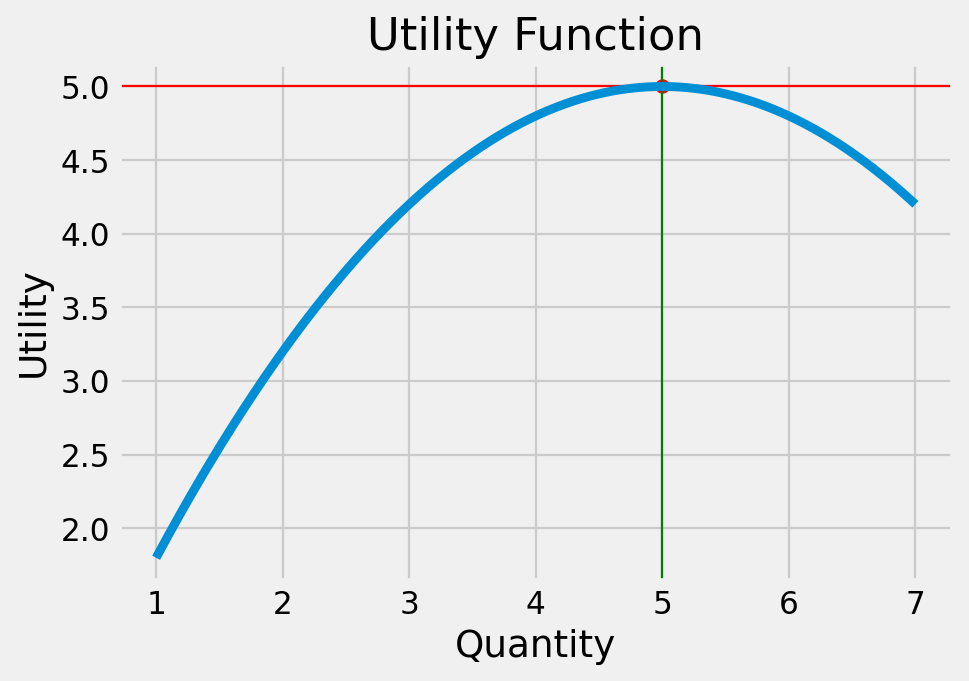

In [210]:
x = np.linspace(1,7, 1000)
y = f(x)
plt.figure()
plt.scatter( 5, f(5) , c='r' )
plt.axhline(y=5, color='r',  linewidth=1)
plt.axvline(x=5, color='g',  linewidth=1)
plt.xlabel('Quantity')
plt.ylabel('Utility')
plt.title('Utility Function')
plt.plot(x,y)

Utility maximizing quantities of x1 and x2 are  symmetric at 5 units.

The Utility at these levels of consumption is 5 units. 



## part b.
### gamma = -5

In [216]:
alpha = 0.5
gamma = -5
p1 = 1
p2 = 1
I = 10
f = lambda x2: (alpha *((I-p2*x2)/p1)** gamma + (1-alpha)*x2**gamma)**(1/gamma)
a = 0
b= 10
x2 = mygolden(f,a,b,maxit = 1000, tol = 1/10000)
x2
x1 = I - p2*x2
x1
U = (alpha *((I-p2*x2)/p1)** gamma + (1-alpha)*x2**gamma)**(1/gamma)
print("Utility:",U, "x1:",x1,"x2:",x2)

Utility: 4.999999998604646 x1: 5.000048224378392 x2: 4.999951775621608


No significant changes in Utility or x1 and x2 from increasing gamma, as x1 and x2 are equally affected by changes to gamma.



In [212]:
alpha = 0.25
gamma = -1
p1 = 1
p2 = 1
I = 10
f = lambda x2: (alpha *((I-p2*x2)/p1)** gamma + (1-alpha)*x2**gamma)**(1/gamma)
a = 0
b= 10
x2 = mygolden(f,a,b,maxit = 1000, tol = 1/10000)
x2
x1 = I - p2*x2
x1
U = (alpha *((I-p2*x2)/p1)** gamma + (1-alpha)*x2**gamma)**(1/gamma)
print("Utility:",U, "x1:",x1,"x2:",x2)


Utility: 5.358983846356859 x1: 3.6603530854529795 x2: 6.3396469145470205


Reducing alpha weights x2 more, as its coefficent is 1- alpha. 

The effect is symmetric, with a 50% reduction in alpha doubling the U-max quantity of x2

In [206]:
alpha = 0.5
gamma = -1
p1 = 1
p2 = 2
I = 20
f = lambda x2: (alpha *((I-p2*x2)/p1)** gamma + (1-alpha)*x2**gamma)**(1/gamma)
a = 0
b= 10
x2 = mygolden(f,a,b,maxit = 1000, tol = 1/10000)
x2
x1 = (I - p2*x2)/p1
x1
U = (alpha *((I-p2*x2)/p1)** gamma + (1-alpha)*x2**gamma)**(1/gamma)
#print("Utility:",U, "x1:",x1,"x2:",x2)
x1

p2 is higher, which impacts the consumers budget constraint. 

The quantities of x1 and x2 reflect this,with x1 being consumed more to maximize utility, assuming identical preferences for x1 and x2

### Part c

In [181]:
U = (alpha *(x1)** gamma + (beta)*x2**gamma +(1-alpha-beta)*(((I-p2*x2-p1*x1)/p3)**gamma))**(1/gamma)
U

In [182]:
alpha = 0.45
beta = 0.35
gamma = -1
p1 = 2
p2 = 3
p3 = 4
I = 10
f = lambda x: (alpha * ((x[0]) ** gamma) + (beta) * (x[1] ** gamma) + (1 - alpha - beta) * (((I - p2 * x[1] - p1 * x[0]) / p3) ** gamma)) ** (1 / gamma)


In [183]:

import copy
f = lambda x: (alpha * (x[0]) ** gamma + (beta) * x[1] ** gamma + (1 - alpha - beta) * (((I - p2 * x[1] - p1 * x[0]) / p3) ** gamma)) ** (1 / gamma)

def nelder_mead(f, x_start,
                step=0.1, no_improve_thr=10e-6,
                no_improv_break=10, max_iter=0,
                alpha=1., gamma=2., rho=-0.5, sigma=0.5):
    '''
    @param f (function): function to optimize, must return a scalar score
        and operate over a numpy array of the same dimensions as x_start
    @param x_start (numpy array): initial position
    @param step (float): look-around radius in initial step
    @no_improv_thr,  no_improv_break (float, int): break after no_improv_break iterations with
        an improvement lower than no_improv_thr
    @max_iter (int): always break after this number of iterations.
        Set it to 0 to loop indefinitely.
    @alpha, gamma, rho, sigma (floats): parameters of the algorithm
        (see Wikipedia page for reference)
    return: tuple (best parameter array, best score)
    '''
    # init
    dim = len(x_start)
    prev_best = f(x_start)
    no_improv = 0
    res = [[x_start, prev_best]]

    for i in range(dim):
        x = copy.copy(x_start)
        x[i] = x[i] + step
        score = f(x)
        res.append([x, score])

    # simplex iter
    iters = 0
    while 1:
        # order
        res.sort(key=lambda x: x[1])
        best = res[0][1]

        # break after max_iter
        if max_iter and iters >= max_iter:
            return res[0]
        iters += 1

        # print intermediate results
        print('...Best so far:', best)

        # break after no_improv_break iterations with no improvement        
        if best < prev_best - no_improve_thr:
            no_improv = 0
            prev_best = best
        else:
            no_improv += 1

        if no_improv >= no_improv_break:
            return res[0]

        # centroid
        x0 = [0.] * dim
        for tup in res[:-1]:
            for i, c in enumerate(tup[0]):
                x0[i] += c / (len(res)-1)

        # reflection
        xr = x0 + alpha*(x0 - res[-1][0])
        rscore = f(xr)
        if res[0][1] <= rscore < res[-2][1]:
            del res[-1]
            res.append([xr, rscore])
            continue

        # expansion
        if rscore < res[0][1]:
            xe = x0 + gamma*(x0 - res[-1][0])
            escore = f(xe)
            if escore < rscore:
                del res[-1]
                res.append([xe, escore])
                continue
            else:
                del res[-1]
                res.append([xr, rscore])
                continue

        # contraction
        xc = x0 + rho*(x0 - res[-1][0])
        cscore = f(xc)
        if cscore < res[-1][1]:
            del res[-1]
            res.append([xc, cscore])
            continue

        # reduction (shrinkage)
        x1 = res[0][0]
        nres = []
        for tup in res:
            redx = x1 + sigma*(tup[0] - x1)
            score = f(redx)
            nres.append([redx, score])
        res = nres



Nelder Mead computes a minimum, therefore taking -f(x) computes the max

In [184]:
def g(x):
    return -1 *f(x)


In [186]:
nelder_mead(g, np.array([1., 1.]))

...Best so far: -1.0801963993453354
...Best so far: -1.1313657407407407
...Best so far: -1.1623137322682997
...Best so far: -1.2134938939119762
...Best so far: -1.2134938939119762
...Best so far: -1.2134938939119762
...Best so far: -1.214212260525492
...Best so far: -1.2152806137567185
...Best so far: -1.2156265843433378
...Best so far: -1.2156265843433378
...Best so far: -1.2158443423746907
...Best so far: -1.2158569843414913
...Best so far: -1.21586356714352
...Best so far: -1.2159041327825282
...Best so far: -1.2159041327825282
...Best so far: -1.2159041327825282
...Best so far: -1.2159041327825282
...Best so far: -1.215906405341074
...Best so far: -1.215906405341074
...Best so far: -1.2159070933139973
...Best so far: -1.2159070933139973
...Best so far: -1.2159073529830975
...Best so far: -1.215907409155149
...Best so far: -1.2159076333306758


[array([1.65428711, 1.19082411]), -1.2159076333306758]

### Finding x1, x2, x3 and U

In [227]:
x1 =1.65428711
x2 =1.19082411

alpha = 0.45
beta = 0.35
gamma = -1
p1 = 2
p2 = 3
p3 = 4
I = 10
x3 = (I-p1*x1-p2*x2)/p3
U = (alpha *(x1)** gamma + beta*(x2**gamma) +(1-alpha-beta)*(x3**gamma))**(1/gamma)
print(U,x1,x2,x3)

1.21590763332988 1.65428711 1.19082411 0.7797383624999998


Max Utility and quantities of commodities is lesser than part a. due to higher prices with the same budget constraint value for 1

### 3d Plot

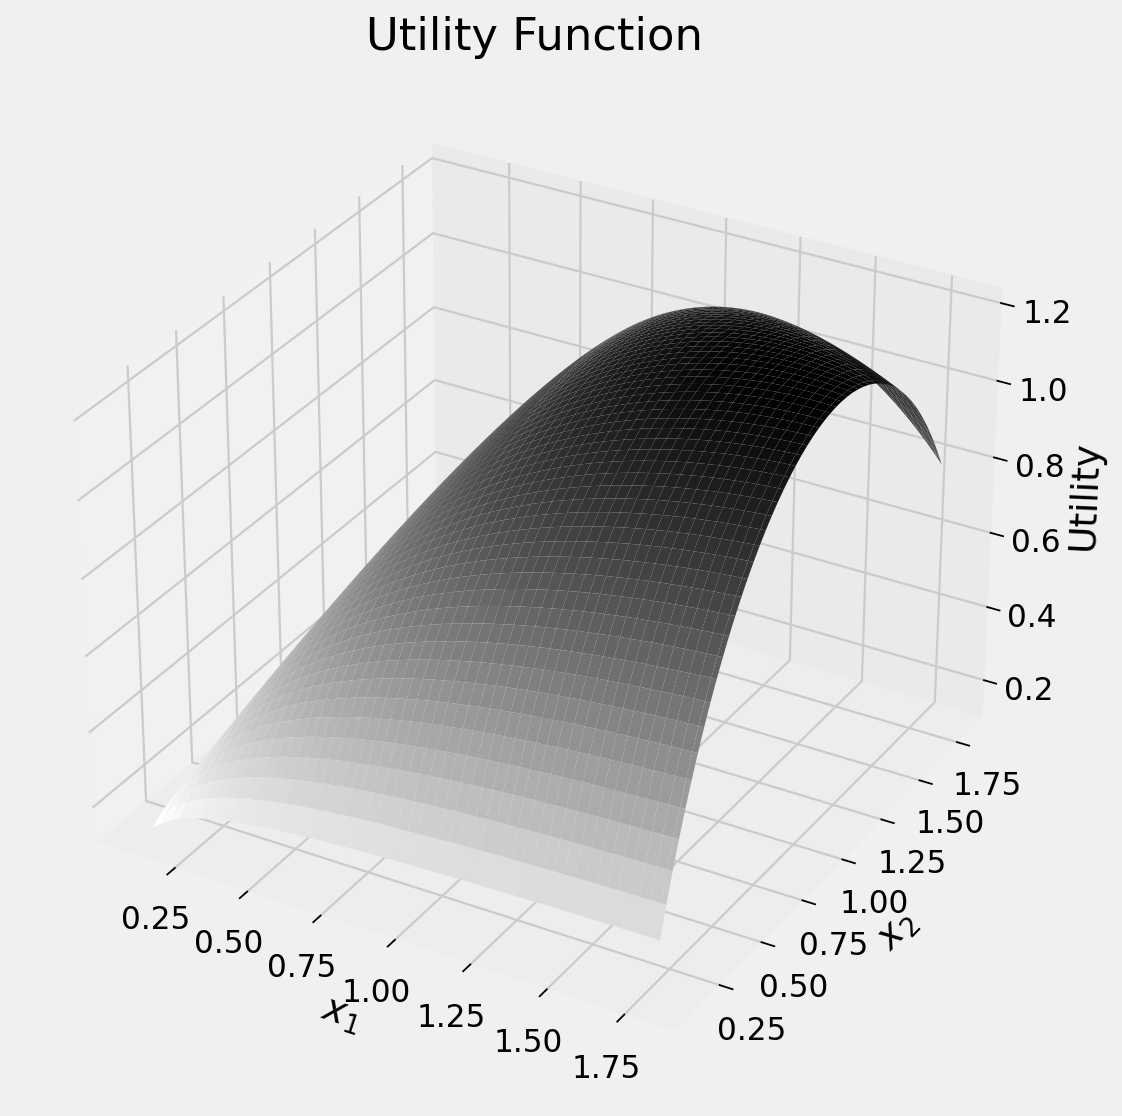

In [235]:
import numpy as np
import matplotlib.pyplot as plt


# Utility function
def f(x1,x2):
    return (alpha *(x1)** gamma + (beta)*x2**gamma +(1-alpha-beta)*(((I-p2*x2-p1*x1)/p3)**gamma))**(1/gamma)
# Calculate x3 using budget constraint


# Generate x1 and x2 values
x1_vals = np.linspace(0.1, 1.8, 100)
x2_vals = np.linspace(0.1, 1.8, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Calculate utility values
U = f(X1,X2)

# Plot contour plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, U, cmap='binary')

# Add color bar
#fig.colorbar(surf, shrink=0.5, aspect=5)

# Set axis labels and title
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('Utility')
ax.set_title('Utility Function')

plt.show()

### 2d plot

/var/folders/gw/cwybnd7d7_b4q_nn3skpm9h80000gq/T/ipykernel_53762/854662781.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(contour, label='Utility')


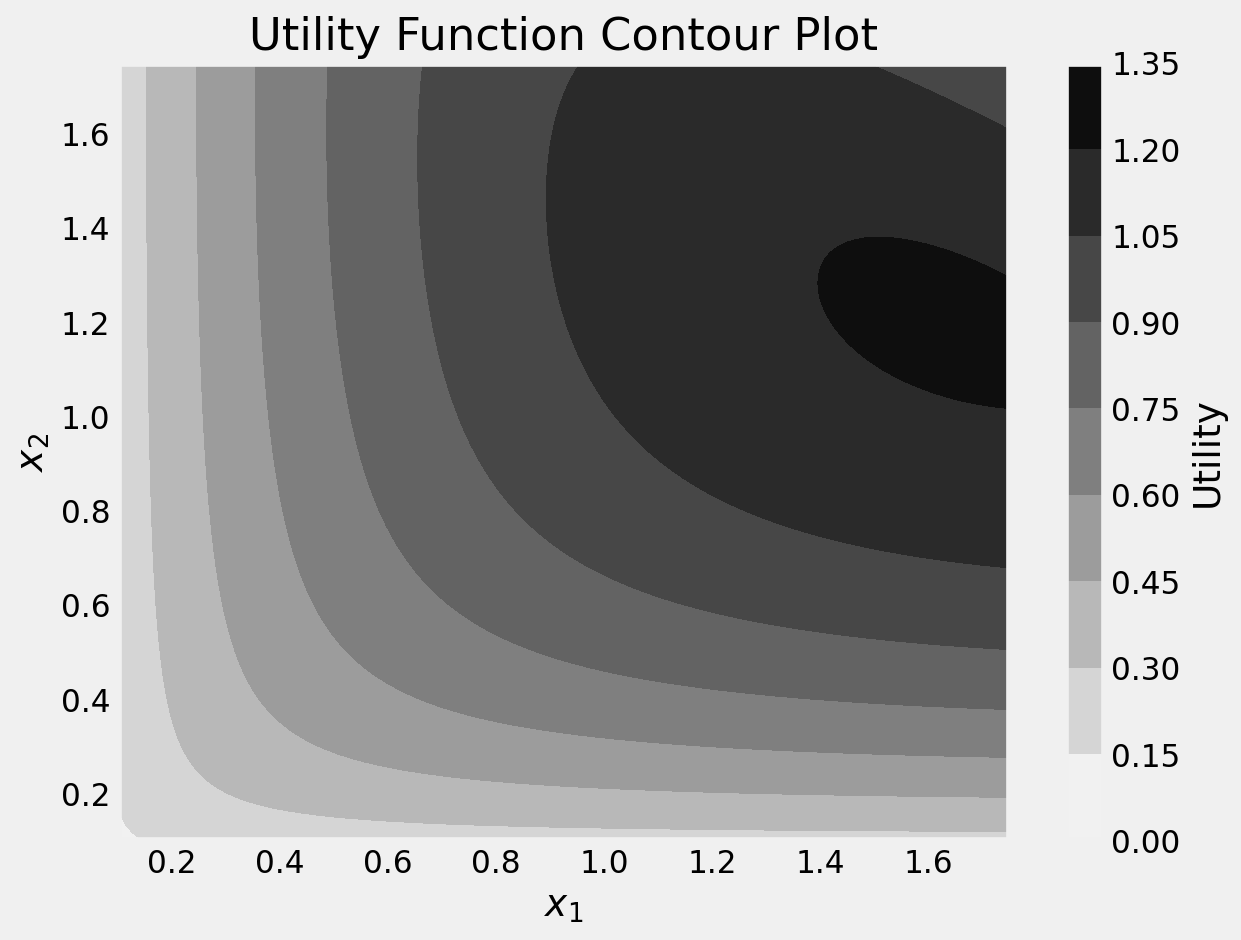

In [234]:
def f(x1,x2):
    return (alpha *(x1)** gamma + (beta)*x2**gamma +(1-alpha-beta)*(((I-p2*x2-p1*x1)/p3)**gamma))**(1/gamma)


alpha = 0.45
beta = 0.35
gamma = -1
p1 = 2
p2 = 3
p3 = 4
I = 10

# Generate x1 and x2 values
x1_vals = np.linspace(0.1, 1.75, 100)
x2_vals = np.linspace(0.1, 1.75, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Calculate utility values
U = f(X1,X2)
plt.figure(figsize=(8, 6))
contour = plt.contourf(X1, X2, U, cmap='binary')
plt.colorbar(contour, label='Utility')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Utility Function Contour Plot')
plt.grid(True)
plt.show()

## Question 1

## part a.

In [122]:
c = 0.6
b = 1500
k = 4.0
h = 1000
t = 0.2
alpha = 0.4
C_bar = 160
I_bar = 100
L_bar = 225
G_bar = 200
W_bar = 10
K_bar = 5000
M_bar = 2052.3
P = 1

aux = (c*(1- t)-1)/b - k/h


In [123]:
def ADAS_system(variables):
    """
    System of non-linear equations for AD-AS model
    
    exogenous variables (autonomous components ) 
        global C_bar I_bar G_bar M_bar W_bar L_bar A_bar K_bar b h alpha aux 
    
    endogenous variables:
        Y, GDP: 
        P, price: 
        
    """
    (Y,A_bar) =variables
    
    # global C_bar, I_bar, G_bar, M_bar, W_bar, L_bar, A_bar, K_bar, b, h, c, k, alpha, aux
    # if we want to change the value of global variables
    # aux = (c*(1- t)-1)/b - k/h # auxiliary variable for AD curve
    
    # f = np.zeros(2) # # This is the function whose zero we want to find
    
    AD_eq = Y-1/h*(L_bar-M_bar / P)/ aux+1/b*(C_bar+I_bar+G_bar )/aux
    AS_eq = Y - A_bar*K_bar**alpha * (W_bar/P * K_bar**(-alpha)/((1-alpha)*A_bar))**((alpha-1)/alpha)

    return [AD_eq, AS_eq]

In [124]:
Y0, A0 = (500, 5) # initial guesses for Y and P, respectively


import math
import scipy.optimize as opt


Ystar,Astar = opt.fsolve(ADAS_system, (Y0, A0 ) )

In [125]:
Ystar,Astar

With the parameters provided, output in this economy is approx 490 units, and Productivity is approx 2 units,assuming the average level of money supply in 1983 and a constant Price level.

In [126]:
print( 'Computed endogenous variables:\n') 
print('-----------------------------------------------------------\n')
print('GDP, Y = {0:.2f}， \
       \nProductivity, A = {1:.2f}'.format(Ystar,Astar)) 

# Show variable of interest                                        
                                       
Rstar = 1/h * (L_bar - M_bar/P + k*Ystar) 
Consumption = C_bar + c * 0.8 * Ystar
Investment = I_bar - b * Rstar

Consumption,Investment



print('Interest rate(%), r = {0:.2f}'.format(Rstar*100)
     )
print('Consumption, C = {0:.2f}'.format(Consumption)
     )
print('Investment, I = {0:.2f}'.format(Investment)
     )

Computed endogenous variables:

-----------------------------------------------------------

GDP, Y = 490.94，        
Productivity, A = 2.14
Interest rate(%), r = 13.65
Consumption, C = 395.65
Investment, I = -104.71


Negative investment is the mathematically correct solution given the model parameters, but the economically correct value would be 0

### part b.

In [142]:
c = 0.6
b = 1500
k = 4.0
h = 1000
t = 0.2
alpha = 0.4
C_bar = 160
I_bar = 100
L_bar = 225
G_bar = 200
W_bar = 20
K_bar = 5000
M_bar = 5981.6 
A_bar = 2.137 # exogenous productivity
aux = (c*(1- t)-1)/b - k/h

# Autonomous components


def ADAS_system(variables):
    """
    System of non-linear equations for AD-AS model
    
    exogenous variables (autonomous components ) 
        global C_bar I_bar G_bar M_bar W_bar L_bar A_bar K_bar b h alpha aux 
    
    endogenous variables:
        Y, GDP: 
        P, price: 
        
    """
    (Y,P) =variables
    
    # global C_bar, I_bar, G_bar, M_bar, W_bar, L_bar, A_bar, K_bar, b, h, c, k, alpha, aux
    # if we want to change the value of global variables
    # aux = (c*(1- t)-1)/b - k/h # auxiliary variable for AD curve
    
    # f = np.zeros(2) # # This is the function whose zero we want to find
    
    AD_eq = Y-1/h*(L_bar-M_bar / P)/ aux+1/b*(C_bar+I_bar+G_bar )/aux
    AS_eq = Y - A_bar*K_bar**alpha * (W_bar/P * K_bar**(-alpha)/((1-alpha)*A_bar))**((alpha-1)/alpha)

    return [AD_eq, AS_eq]

In [143]:
Y0, P0 = (500, 5) # initial guesses for Y and P, respectively


import math
import scipy.optimize as opt


Ystar,Pstar = opt.fsolve(ADAS_system, (Y0, P0 ) )

In [187]:
print( 'Computed endogenous variables:\n') 
print('-----------------------------------------------------------\n')
print('GDP, Y = {0:.2f}， \
       \nProductivity, P = {1:.2f}'.format(Ystar,Pstar))

Computed endogenous variables:

-----------------------------------------------------------

GDP, Y = 612.33，        
Productivity, P = 2.32


The model does not account for the increase in price level from 1983 to 2003, with the price level increasing by 131% but output only increasing by 24.8 percent 

accounting for the increase in wages but keeping money supply the same as 1983 causes a 33% fall in output with a 53% rise in price level

accounting for the increase in money supply but keeping nominal wages the same as 1983 causes output to increase by 88% with a 52% rise in price level